# perform an A/B Test for ad campaign using python 

<img src="files/ab-testing.png" width="200">

<div>Icons made by <a href="https://flat-icons.com/" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>




<br>

### AB testing is essentially an experiment where two or more variants are evaluated by  statistical analysis to determine which variation performs better for a given conversion goal
<br>

### You are hired by a digital marketing agency that designed a new ad for their client and This ad is hosted on a website .They hired you to do an A/B test to advise them on whether they should go for the new ad or not .

## Task one : Load the dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
#load the dataset
df = pd.read_excel("AB Test.xlsx")

In [3]:
#show the dataframe head
df.head()


,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [4]:
#show dataframe info
df.info()
#no null values and 3000+ rows of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


# Task Two : Set up the hypothesis testing steps


In [5]:
#find insights in our data
df['group'].value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

In [9]:
#find insights in our data
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

### experiment group : 
the group that is involved in the new experiment . i.e the group that received the new ad . 
### Control group : 
the 2nd group that didn't receive the new ad
### Click-through rate (CTR) : 
the number of clicks advertisers receive on their ads per number of impressions.


## Hypothesis Testing steps:

1) Specify the Null Hypothesis.
<br>
2) Specify the Alternative Hypothesis.
<br>
3) Set the Significance Level (a)
<br>
4) Calculate the  Corresponding P-Value.
<br>
5) Drawing a Conclusion



## Null Hypothesis:
The null hypothesis is what we assume to be true before we collect any data. 
<br>H0 is new rate < = old rate


## Alternative Hypothesis:
The alternative Hypothesis is what we want to try and prove to be true. 
<br>H1 is new rate > old rate

## Task Three : Compute the difference in the click-through rate 

In [10]:
# Get dataframe with all observations from control group 
control_df = df.query('group =="control"')

# Compute CTR for control group 
control_ctr = control_df.query('action == "view and click"').index.nunique()/control_df.index.nunique()

#Display the CTR For the control group
control_ctr

0.19349680170575692

In [11]:
# Get dataframe with all records from experiment group 
experiment_df = df.query('group =="experiment"')

# Compute click through rate for experiment group 
experiment_ctr = experiment_df.query('action == "view and click"').index.nunique()/control_df.index.nunique()

#Display the CTR For the experiment group
experiment_ctr

0.16631130063965885

In [12]:
#Compute the difference in the CTR 
diff = experiment_ctr - control_ctr
#display the difference 
diff

# This means that the experiment CTR < control CTR

-0.027185501066098072

# Task four : create sample distribution using bootsrapping

## Bootstrapping : 
The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.

## Example : 
Bootstrapping in statistics, means sampling with replacement.
so if we have a group of individuals and , and want to bootsrap sample of ten individuals from this group , we could randomly sample any ten individuals but with bootsrapping, we are sampling with replacement so we could actually end up sampling 7 out of the ten individuals and three of the previously selected individuals might end up being sampled again

<img src="files/Bootstrapping.png" width="600">

In [14]:
#bootsrapping
differences = []
size = df.shape[0]
for i in range(10000):
    sample = df.sample(size, replace = True)
    control_df = sample.query('group == "control"')
    control_ctr = control_df.query('action == "view and click"').index.nunique()/control_df.index.nunique()
    experiment_df = sample.query('group == "experiment"')
    experiment_ctr = experiment_df.query('action == "view and click"').index.nunique()/experiment_df.index.nunique()
    differences.append(experiment_ctr - control_ctr)

# Task five : Evaluate the null hypothesis and draw conclustions.

### The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

(array([  22.,  140.,  664., 1721., 2755., 2632., 1465.,  503.,   89.,
           9.]),
 array([-0.06209659, -0.05504038, -0.04798418, -0.04092797, -0.03387176,
        -0.02681555, -0.01975934, -0.01270314, -0.00564693,  0.00140928,
         0.00846549]),
 <BarContainer object of 10 artists>)

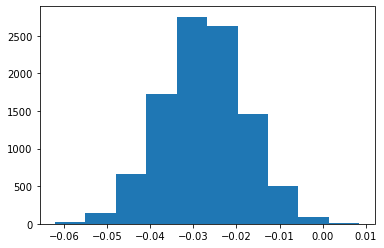

In [15]:
# Plot the sampling distribution 
differences = np.array(differences)
plt.hist(differences)

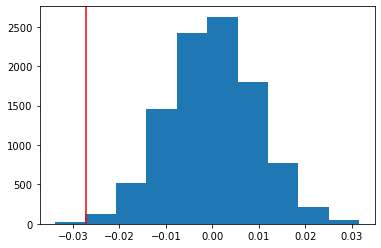

In [17]:
#simulate the distribution under the null hypothesis 
null_hypothesis = np.random.normal(0, differences.std(),differences.size)


#plot the null distribution 
plt.hist(null_hypothesis)
plt.axvline(diff, c = 'red')

###  The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

### The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%.

###  i.e for P Value less than 0.05 we are 95% percent confident that we can reject the null hypothesis 

In [20]:
# Compute the  P-value 
pvalue = (null_hypothesis>diff).mean()
print(pvalue)
#fail to reject H0 because pvalue is 99.78%

0.9978
